# Exercises and Problems for Module 2

In [193]:
import numpy as np
from pint import UnitRegistry
import matplotlib.pyplot as plt
import Utils16101
import sympy
sympy.init_printing()
%matplotlib inline

In [194]:
ureg = UnitRegistry()
Q_ = ureg.Quantity

## Exercise 2.4.2: compute lift coefficient

First aircraft (Cessna like)

In [195]:
w1 = Q_(2400.,'lbf')
Sref1 = Q_(180.,'foot**2')
v1 = Q_(140.,'mph')
alt1 = Q_(12e3,'foot')
ρ1 = Q_(1.6e-3,'slug/foot**3')

Second aircraft (*B777* like)

In [196]:
w2 = Q_(550e3,'lbf')
Sref2 = Q_(4.6e3,'foot**2')
v2 = Q_(560.,'mph')
alt2 = Q_(35e3,'foot')
ρ2 = Q_(7.4e-4,'slug/foot**3')

**Results**

In [197]:
print("First aircraft: ",Utils16101.computeLiftCoeff(w1,Sref1,v1,alt1,ρ1))
print("Second aircraft: ",Utils16101.computeLiftCoeff(w2,Sref2,v2,alt2,ρ2))

First aircraft:  0.3953028287585151 dimensionless
Second aircraft:  0.47903177691800075 dimensionless


## Exercise 2.4.3: drag comparison

Hypoteses:
* $C_{Dcyl}\approx1$ and $C_{Dfair}\approx0.01$
* $S_{ref\ cyl} = d\cdot h$, and $S_{ref\ fair} = c\cdot h$, with $c = 10d$
* same $V_{\infty}$

Expression of Drag:

$$D = \frac{1}{2} \cdot C_D \rho V_{\infty}^2 S_{ref}$$

Ratio of Drags

$$\frac{D_{cyl}}{D_{fair}} = \frac{\frac{1}{2} \cdot C_{Dcyl} \rho V_{\infty}^2 S_{ref\ cyl}}{\frac{1}{2} \cdot C_{Dfair} \rho V_{\infty}^2 S_{ref\ fair}} = \frac{C_{Dcyl} \cdot dh}{C_{Dfair} \cdot 10dh} $$

## Exercise 2.4.7: _Mach_ and _Reynolds_ number comparisons

First aircraft additional parameters:

In [198]:
c1 = Q_(5.0,'foot')
μ1 = Q_(3.5e-7,'slug/foot/second')
a1 = Q_(1.1e3,'foot/second')

Second aircraft additional parameters

In [199]:
c2 = Q_(23.0,'foot')
μ2 = Q_(3.0e-7,'slug/foot/second')
a2 = Q_(9.7e2,'foot/second')

In [200]:
Ma1, Re1 = Utils16101.computeMachRe(v1,a1,μ1,c1,ρ1)
Ma2, Re2 = Utils16101.computeMachRe(v2,a2,μ2,c2,ρ2)
print("First aircraft - Ma: {0:10.3e}  Re: {1:10.3e}".format(Ma1.magnitude,Re1.magnitude))
print("Second aircraft - Ma: {0:10.3e}  Re: {1:10.3e}".format(Ma2.magnitude,Re2.magnitude))

First aircraft - Ma:  1.867e-01  Re:  4.693e+06
Second aircraft - Ma:  8.467e-01  Re:  4.660e+07


## Exercise 2.4.10: dynamic similarity

**Wind tunnel** test conditions

In [201]:
ρ_inf = Q_(2.4e-3,'slug/ft**3')
a_inf = Q_(1.1e3,'ft/s')
μ_inf = Q_(3.7e-7,'slug/ft/s')

v = Q_(200.,'mph')
c = c1/4

In [202]:
Ma_wt, Re_wt = Utils16101.computeMachRe(v,a_inf,μ_inf,c,ρ_inf)
print("Wind tunnel - Ma: {0:10.3e}  Re: {1:10.3e}".format(Ma_wt.magnitude,Re_wt.magnitude))

Wind tunnel - Ma:  2.667e-01  Re:  2.378e+06


## Exercise 2.5.2: minimum Takeoff velocity

Minimum required lift: **L = W** as $V_{\infty} \perp \vec{g} $

$$L = W = \frac{1}{2} \cdot \rho V_{\infty}^2 C_L * S_{ref} $$

In [203]:
W = Q_(650e3,'lbf')
Sref = Q_(4.6e3,'ft**2')
ρ_inf = Q_(2.4e-3,'slug/ft**3')
CL_max = 2.5

In [204]:
V_inf = np.sqrt(2*W.to('slug*ft/s**2')/(ρ_inf*CL_max*Sref))
print(V_inf.to('mph'))

147.97411698442224 mph


## Exercise 2.6.2: Range estimate

**Breguet** equation for determining range (level flight, no _takeoff_ or _landing_):

$$R = \eta_0 \cdot \frac{L}{D} \cdot \frac{Q_R}{g} \cdot \ln \left(1+\frac{W_{fuel}}{W_{final}}\right)$$

In [205]:
η0 = Q_(0.32,'dimensionless')
LoverD = Q_(17.,'dimensionless')
QR = Q_(42.,'MJ/kg')
g = Q_(9.80665,'m/s**2')
W_in = Q_(400e3,'kg')
W_fuel = Q_(175e3,'kg')
W_final = W_in - W_fuel

In [206]:
R = η0 * LoverD * QR.to('m**2/s**2')/g*np.log(1+W_fuel/W_final)
print("Range = {0:10.3e}".format(R.to('km')))

Range =  1.341e+04 kilometer


# Sample Problems

## Problem 2.7.1: Lift and Drag for flat plate in supersonic flow

Hypoteses:
* $\Delta p = p_l - p_u > 0$
* $p_l , p_u constant $
* $\alpha \ small \rightarrow \cos(\alpha) \approx 1, \sin(\alpha) \approx \alpha$

Relations:
$$
\begin{align}
L &= \Delta p \cdot S \cos(\alpha) \\
D &= \Delta p \cdot S \sin(\alpha)
\end{align}
$$
**Lift** and **Drag** coefficients:
$$
\begin{align}
C_L &= \frac{L}{\frac{1}{2}\rho_{\infty} V_{\infty}^2S} &\approx \frac{\Delta p}{\frac{1}{2}\rho_{\infty} V_{\infty}^2} \\
C_D &= \frac{D}{\frac{1}{2}\rho_{\infty} V_{\infty}^2S} &\approx \frac{\Delta p \alpha}{\frac{1}{2}\rho_{\infty} V_{\infty}^2}
\end{align}
$$

$\Delta p \propto \alpha$ for *supersonic flow* and *small angle*
$$
\begin{align}
C_L &\approx \frac{\Delta p}{\frac{1}{2}\rho_{\infty} V_{\infty}^2} &\propto \frac{\alpha}{\frac{1}{2}\rho_{\infty} V_{\infty}^2}\\
C_D &\approx \frac{\Delta p \alpha}{\frac{1}{2}\rho_{\infty} V_{\infty}^2} &\propto \frac{\alpha^2}{\frac{1}{2}\rho_{\infty} V_{\infty}^2S} 
\end{align}
$$

## Problem 2.7.2: Aerodynamic performance

Aircraft parameters:

In [207]:
W = Q_(550e3,'lbf')
Sref = Q_(4.6e3,'ft**2')
AR = Q_(9.,'dimensionless')

Air parameters at two different altitudes

In [208]:
ρ_inf1 = Q_(1.6e-3,'slug/ft**3') #1.2e4 ft
ρ_inf2 = Q_(7.3e-4,'slug/ft**3') #3.5e4 ft
a_inf1 = Q_(1069.,'ft/s')
a_inf2 = Q_(973.,'ft/s')

Aircraft speed

In [209]:
Ma = Q_(0.85,'dimensionless')

**Parabolic drag model**

$$C_D = C_{D0} + \frac{C_L^2}{\pi e AR}$$

with:
* _AR_: Aspect ratio
* _e_: **Oswald** span efficiency

In [210]:
C_D0 = Q_(0.05,'dimensionless')
e_osw = Q_(0.8,'dimensionless')

In [211]:
V_inf1 = Ma*a_inf1
V_inf2 = Ma*a_inf2

C_L1 = W.to('slug*ft/s**2')/(0.5*ρ_inf1*V_inf1**2*Sref)
C_L2 = W.to('slug*ft/s**2')/(0.5*ρ_inf2*V_inf2**2*Sref)
print("Lift coefficient at 12000ft: {0:10.3e}".format(C_L1))
print("Lift coefficient at 35000ft: {0:10.3e}".format(C_L2))

Lift coefficient at 12000ft:  1.810e-01 dimensionless
Lift coefficient at 35000ft:  4.789e-01 dimensionless


**NB**: _Drag count_ $\rightarrow C_D \cdot 10^4$

In [212]:
C_D1 = C_D0 + C_L1**2/(np.pi*e_osw*AR)
C_D2 = C_D0 + C_L2**2/(np.pi*e_osw*AR)
print("Drag count at 12000ft: {0:10.1f}".format(C_D1*1e4))
print("Drag count at 35000ft: {0:10.1f}".format(C_D2*1e4))

Drag count at 12000ft:      514.5 dimensionless
Drag count at 35000ft:      601.4 dimensionless


Lift to Drag ratio:

In [213]:
L_D1 = C_L1/C_D1
L_D2 = C_L2/C_D2
print("Lift to Drag ratio at 12000ft: {0:10.3e}".format(L_D1))
print("Lift to Drag ratio at 35000ft: {0:10.3e}".format(L_D2))

Lift to Drag ratio at 12000ft:  3.518e+00 dimensionless
Lift to Drag ratio at 35000ft:  7.963e+00 dimensionless


**Required Thrust**: $T = D$

In [214]:
T1 = 0.5*C_D1*ρ_inf1*V_inf1**2*Sref
T2 = 0.5*C_D2*ρ_inf2*V_inf2**2*Sref
print("Thrust required at 12000ft: {0:10.3e}".format(T1.to('lbf')))
print("Thrust required at 35000ft: {0:10.3e}".format(T2.to('lbf')))

Thrust required at 12000ft:  1.563e+05 force_pound
Thrust required at 35000ft:  6.907e+04 force_pound


**Required Power**: $P = T \cdot V_{\infty}$

In [215]:
P1 = T1.to('lbf')*V_inf1
P2 = T2.to('lbf')*V_inf2
print("Power required at 12000ft: {0:10.3e}".format(P1))
print("Power required at 35000ft: {0:10.3e}".format(P2))

Power required at 12000ft:  1.420e+08 foot * force_pound / second
Power required at 35000ft:  5.712e+07 foot * force_pound / second


## Problem 2.7.3: sensitivity of payload

Using **Breguet** equation and comparing terms to get the same range
$$ 0.99 \eta_0 \frac{L}{D} \cdot \frac{Q_R}{g} \ln \left(\frac{W_{in}-100n}{W_{fin}-100n}\right)  = 
\eta_0 \frac{L}{D} \cdot \frac{Q_R}{g} \ln \left(\frac{W_{in}}{W_{fin}}\right)$$
which gives:
$$  \left(\frac{W_{in}-100n}{W_{fin}-100n}\right)^{0.99}  = \left(\frac{W_{in}}{W_{fin}}\right)$$




In [216]:
Win = 400e3
Wfin = 400e3-175e3

In [217]:
n = np.arange(25.,35.)
y = ((Win-100*n)/(Wfin-100*n))**0.99 - Win/Wfin

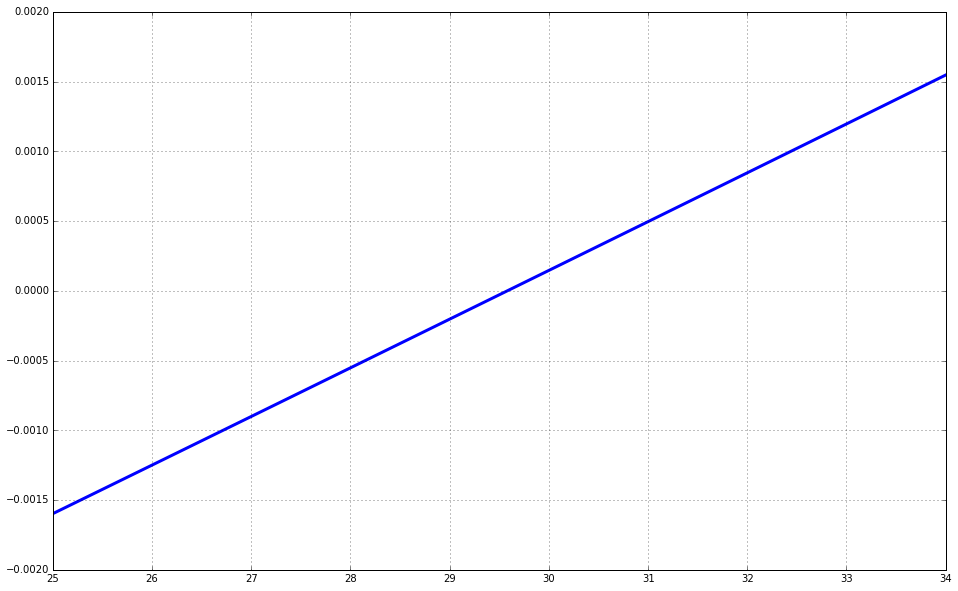

In [218]:
plt.figure(figsize=(16,10), dpi=300)
plt.plot(n, y, lw=3.)
plt.grid();

In [219]:
zero_crossing = np.where(np.diff(np.sign(y)))[0]+1

In [220]:
print("number of passengers: {0:d}".format(int(n[zero_crossing])))

number of passengers: 30


## Problem 2.7.4: rate of climb

Relations:
- $\dot{h} = V_{\infty} \sin(\theta)$
- $ T = D + W \sin(\theta)$

so:
$$ \dot{h} = V_{\infty} \cdot \frac{T-D}{W}$$

## Problem 2.7.5: maximum lift-to-drag ratio

In [221]:
Cd, Cd0, K = sympy.symbols('C_D C_D0 K')

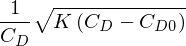

In [222]:
expr = sympy.sqrt((Cd-Cd0)*K)/Cd
expr

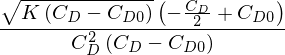

In [223]:
sympy.simplify(sympy.diff(expr,Cd))

Maximum lift to drag ratio for $C_D = 2D_{D0}$

$$ \left(\frac{L}{D} \right)_{max} = \frac{1}{2}\sqrt{\frac{\pi e AR}{C_{D0}}}$$

# Homework

## Problem 2.8.1: cryogenic wind tunnel test

Small aircraft flying at following conditions:

In [224]:
V_full = Q_(10.,'m/s')
ρ_full = Q_(0.5,'kg/m**3')
T_full = Q_(233.,'K')

Air supposed to be ideal gas:

In [225]:
R = Q_(287,'J/kg/K')
γ = Q_(1.4,'dimensionless')

Temperature - viscosity dependance: $\frac{\mu_1}{\mu_2} = \sqrt{\frac{T_1}{T_2}}$

**Freestream pressure**

In [226]:
p_full = ρ_full*R*T_full
print("Freestream pressure: {0:10.3e}".format(p_full.to('Pa')))

Freestream pressure:  3.344e+04 pascal


** Mach number**

In [227]:
a_full = np.sqrt(γ*R.to('m**2/s**2/K')*T_full)
Ma_full = V_full/a_full
print("Fullscale Mach number: {0:10.3e}".format(Ma_full))

Fullscale Mach number:  3.268e-02 dimensionless


In [228]:
scale = Q_(0.2,'dimensionless')
p_scale = Q_(1e5,'Pa')

** Compare Reynolds and Mach numbers:**
$$
\begin{align}
Re: & \frac{\rho_f V_f l_f }{\mu_f} &=& \frac{\rho_s V_s l_s}{\mu_s} &\rightarrow & \frac{\rho_s}{\rho_f} &=&
\frac{\mu_s}{\mu_f} \cdot \frac{V_f}{V_s} \cdot \frac{1}{scale} \\
Mach: & \frac{V_f}{a_f} &=& \frac{V_s}{a_s} &\rightarrow & \frac{}{} \frac{V_s}{V_f} &=&
\sqrt{\frac{T_f}{T_s}} \\
\end{align}
$$
Using temperature - viscosity dependance:
$$ \frac{\rho_s}{\rho_f} = \frac{1}{scale} $$

Knowing $\rho_s$ from relation above and $p_s$ and using $p = \rho RT$ we find $T_s$

From _Mach number_ relation we find $V_s$

In [229]:
ρ_scale = ρ_full / scale
T_scale = p_scale.to('kg/m/s**2')/R.to('m**2/s**2/K')/ρ_scale
V_scale = np.sqrt(T_scale/T_full)*V_full

In [230]:
print("Scaled model density: {0:10.3f}".format(ρ_scale))
print("Scaled model Temperature: {0:10.3f}".format(T_scale))
print("Scaled model velocity: {0:10.3f}".format(V_scale))

Scaled model density:      2.500 kilogram / meter ** 3
Scaled model Temperature:    139.373 kelvin
Scaled model velocity:      7.734 meter / second


** Drag comparison **
$$D = \frac{1}{2}C_D\rho V_{\infty}^2S_{ref}$$

comparing drag:

$$\frac{D_f}{D_s} = \frac{\rho_f V_{\infty f}^2}{\rho_s V_{\infty s}^2} \cdot \frac{1}{scale^2}$$

In [231]:
D_scale = Q_(100.,'N')

D_full = D_scale*ρ_full/ρ_scale*(V_full/V_scale)**2/(scale**2)

print("Full model Drag: {0:10.3f}".format(D_full))

Full model Drag:    835.887 newton


## Problem 2.8.2: impact of winglet on performance

Data:

In [232]:
η0 = Q_(0.34,'dimensionless')
LD = Q_(16.,'dimensionless')
Win = Q_(225e3,'kg')
Wfuel = Q_(105e3,'kg')
Wfinal = Win-Wfuel
Qr = Q_(42.,'MJ/kg')
g = Q_(9.81,'m/s**2')

In [233]:
rng0 = LD*η0*Qr.to('m**2/s**2')/g*np.log(Win/Wfinal)
print("Original range: {0:10.3f}".format(rng0.to('km')))

Original range:  14640.622 kilometer


**Winglets** give 5% of reduction of Drag:

Fuel consumption over the same range

$$
\begin{align}
\eta_0 \frac{L}{D} \frac{Q_R}{g} \ln \left(1+\frac{W_{fuel0}}{W_{final}}\right)  &= \eta_0 \frac{L}{0.95D} \frac{Q_R}{g} \ln \left(1+\frac{W_{fuel1}}{W_{final}}\right) \\
\left(1+\frac{W_{fuel0}}{W_{final}}\right)^{0.95}  &= \left(1+\frac{W_{fuel1}}{W_{final}}\right)
\end{align}
$$

In [234]:
Wfuel1 = Wfinal*( (1+Wfuel/Wfinal)**0.95 -1)
print("Improved fuel consumption: {0:10.3f}".format(Wfuel1))

Improved fuel consumption:  98038.133 kilogram


In [235]:
Fuel_dens = Q_(0.81,'kg/l')
Fuel_cost = Q_(0.75,'mol/l') # just joking... can we define new units?

In [236]:
fuel_savings = (Wfuel-Wfuel1)*Q_(365,'1/year')/Fuel_dens*Fuel_cost
print("Annual savings: {0:10.3e}".format(fuel_savings))

Annual savings:  2.353e+06 mole / year


**Winglets** again give 5% of reduction of Drag:

Weight increase over the same range given 1% of fuel reduction

$$
\begin{align}
\eta_0 \frac{L}{D} \frac{Q_R}{g} \ln \left(1+\frac{W_{fuel}}{W_{final}}\right)  &= \eta_0 \frac{L}{0.95D} \frac{Q_R}{g} \ln \left(1+\frac{0.99W_{fuel}}{W_{final1}}\right) \\
\left(1+\frac{W_{fuel}}{W_{final}}\right)^{0.95}  &= \left(1+\frac{0.99W_{fuel}}{W_{final1}}\right)
\end{align}
$$

In [237]:
Wfinal1 = 0.99*Wfuel/((1+Wfuel/Wfinal)**0.95-1)
print("Aircraft mass increment: {0:10.3f}".format(Wfinal1-Wfinal))

Aircraft mass increment:   7236.205 kilogram


In [238]:
fuel_savings1 = 0.01*Wfuel*Q_(365,'1/year')/Fuel_dens*Fuel_cost
print("Annual savings: {0:10.3e}".format(fuel_savings1))

Annual savings:  3.549e+05 mole / year


## Problem 2.8.3: Minimum power flight with *parabolic Drag Model*

Power consumption $P = D \cdot V_{\infty}$

$$
\begin{align}
D &= \frac{1}{2}C_D\rho_{\infty}V_{\infty}^2S_{ref}\\
L &= W \\
L &= \frac{1}{2}C_L\rho_{\infty}V_{\infty}^2S_{ref}
\end{align}
$$

From the above relations:
$$
\begin{align}
P &= \frac{1}{2}C_D\rho_{\infty}V_{\infty}^3S_{ref}\\
V_{\infty} &= \sqrt{\frac{2W}{C_L \rho_{\infty} S_{ref}}}\\
P &= W \cdot \sqrt{\frac{2W}{\rho_{\infty}S_{ref}}} \cdot C_D \cdot C_L^{-\frac{3}{2}}
\end{align}
$$


$C_L$ that minimizes power consumption

In [239]:
Cl, Cd0, K, e, AR, rho, Sr, W = sympy.symbols('C_L C_D0 K e AR rho S_r W')

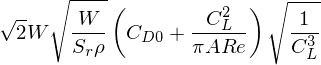

In [240]:
P_expr = sympy.sqrt(2*W/(rho*Sr))*W*(Cd0+Cl**2/(sympy.pi*e*AR))*sympy.sqrt(Cl**(-3))
P_expr

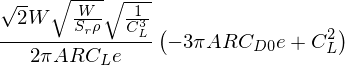

In [241]:
sympy.simplify(sympy.diff(P_expr,Cl))

Lift coefficient at minimum power consumption: $C_L = \sqrt{3 \pi e AR C_{D0}}$

Induced Drag - Total Drag ratio: $C_D = C_{D0} + \frac{C_L^2}{\pi e AR} = C_{D0} + 3 C_{D0}$

$$\frac{C_{Di}}{C_D} = \frac{3}{4}$$

Case of autonomous aircraft

In [242]:
Splan = Q_(0.3,'m**2')
W = Q_(3.5,'N').to('kg*m/s**2')
ρ = Q_(1.225,'kg/m**3')
AR = Q_(10,'dimensionless')
e = Q_(0.95,'dimensionless')
Cd0 = Q_(0.02,'dimensionless')

In [243]:
Cl_min = np.sqrt(3*np.pi*e*AR*Cd0)
print("Lift Coefficient at minimum power consumption: {0:10.3f}".format(Cl_min))

Lift Coefficient at minimum power consumption:      1.338 dimensionless


In [244]:
Cd_min = 4*Cd0
print("Drag Coefficient at minimum power consumption: {0:10.3f}".format(Cd_min))

Drag Coefficient at minimum power consumption:      0.080 dimensionless


In [245]:
Vinf = np.sqrt(2*W/(Cl_min*ρ*Splan))
print("Velocity at minimum power consumption: {0:10.3f}".format(Vinf))

Velocity at minimum power consumption:      3.773 meter / second


In [246]:
T = (0.5*Cd_min*ρ*Vinf**2*Splan).to('N')
print("Thrust required at minimum power consumption: {0:10.3f}".format(T))

Thrust required at minimum power consumption:      0.209 newton


In [247]:
P = (T*Vinf).to('W')
print("Power required at minimum power consumption: {0:10.3f}".format(P))

Power required at minimum power consumption:      0.789 watt
